In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import os
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from networkx.algorithms import community
import random
from collections import Counter
from networkx.utils import groups

In [0]:
def read_edge_files():

    # Retrive all files with name edges in it 
    path = '/content/drive/My Drive/collab_files/facebook/'
    edgeFiles = [file for file in os.listdir(path) if 'edges' in file]
    print("Edge files of existing egonetworks: ",edgeFiles)

    # Retrive all nodes for each ego network in edgefiles

    #egoNodes = [int(ego[:-6]) for ego in edgeFiles ]
    #egoNodes.sort()

    #print("nodes representing egonetworks: ",egoNodes)

    #del edgeFiles
    return edgeFiles

In [7]:
edge_list=read_edge_files()

Edge files of existing egonetworks:  ['414.edges', '107.edges', '686.edges', '0.edges', '698.edges', '348.edges', '1912.edges', '1684.edges', '3437.edges', '3980.edges']


In [0]:
def label_propagation_communities(G):
  label_list = dict()
  labels={}
  for i,n in enumerate(G):
    labels[n]=i
  colors=nx.coloring.greedy_color(G)
  for n,c in colors.items():
    if c in label_list:
      label_list[c].add(n)
    else:
      label_list[c]={n}
  #print(label_list)
  #print(labels)
  while not labeling_complete(labels, G):
    for color, nodes in label_list.items():
      for n in nodes:
        _update_label(n, labels, G)
  for label in set(labels.values()):
    yield {x for x in labels if labels[x] == label}

In [0]:
def labeling_complete(labeling, G):
  return all(labeling[v] in _most_frequent_labels(v, labeling, G)
               for v in G if len(G[v]) > 0)

In [0]:
def _most_frequent_labels(node, labeling, G):
  if not G[node]:
    return {labeling[node]}
  freqs = Counter(labeling[q] for q in G[node])
  max_freq = max(freqs.values())
  return {label for label, freq in freqs.items() if freq == max_freq}

In [0]:
def _update_label(node, labeling, G):
  high_labels = _most_frequent_labels(node, labeling, G)
  if len(high_labels) == 1:
        labeling[node] = high_labels.pop()
  elif len(high_labels) > 1:
    if labeling[node] not in high_labels:
      labeling[node] = max(high_labels)

In [0]:
def plot_LPA_communities(G, pos, communities):
    size = len(communities)
    print ('community count: ', size)
    count = 0.
    # plt.figure(figsize=(fgsize, fgsize))
    # plt.axis('off')
    # plt.margins(tight=True)
    for com in communities :
        count = count + 1.
        list_nodes = [nodes for nodes in com]
        values = [ (count / size) for nodes in list_nodes]
        nodes = nx.draw_networkx_nodes(G, 
                                       pos,
                                       list_nodes,
                                       cmap=plt.get_cmap('jet'),
                                       with_labels=False,
                                       node_size = 120,
                                       node_color = values,
                                       vmin=0.0, vmax=1.0 )
        nodes.set_edgecolor('black')
        nodes.set_linewidth(1.0)
    
    
    edges = nx.draw_networkx_edges(G, pos, alpha=0.5)
    edges.set_linewidth(0.5)
    #plt.savefig('graphs/' + name +'_girvan_communities.png')
    plt.show()

In [0]:
path='/content/drive/My Drive/collab_files/facebook/'

414.edges
community count:  4


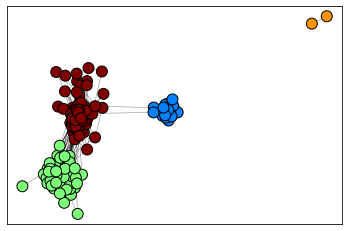

107.edges
community count:  19


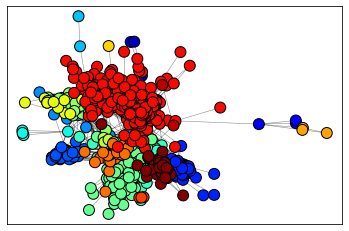

686.edges
community count:  6


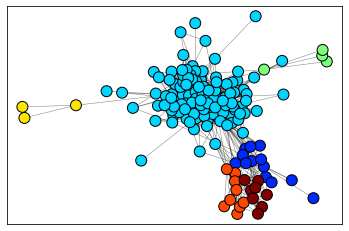

0.edges
community count:  21


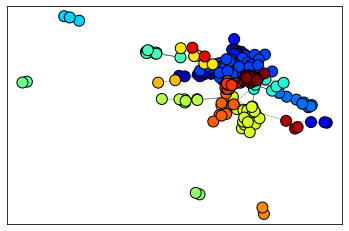

698.edges
community count:  6


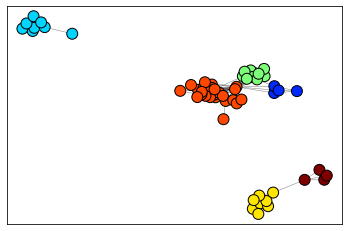

348.edges
community count:  9


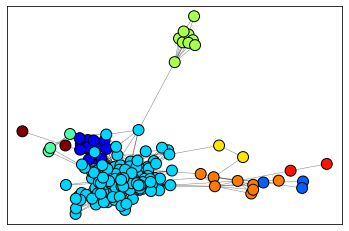

1912.edges
community count:  12


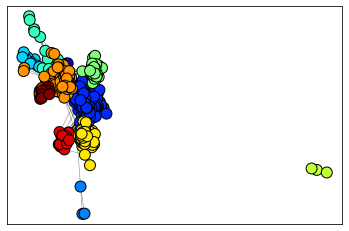

1684.edges
community count:  14


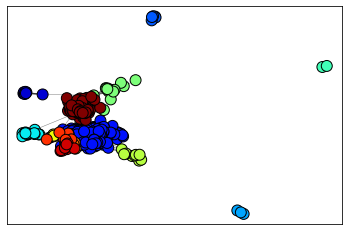

3437.edges
community count:  16


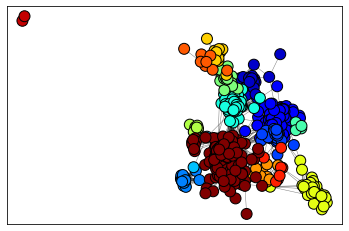

3980.edges
community count:  7


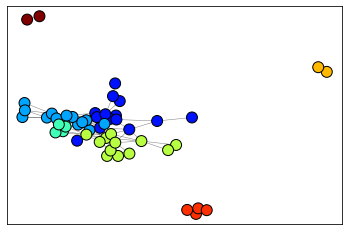

In [14]:
for file in edge_list:
  res=[]
  print(file)
  file_path=path+file
  G=nx.read_edgelist(file_path,create_using=nx.Graph(),nodetype=int)
  pos_list=nx.spring_layout(G)
  #G_res=list(G)
  #print(G_res)
  #print(nx.info(G))
  res=list(label_propagation_communities(G))
  #print(res)
  plot_LPA_communities(G,pos_list,res)
  #print(len(G_res))
  #print(len(G_res))
  #for i in range(len(res)):
   # sum+=len(res[i])
  #print(sum)

414.edges


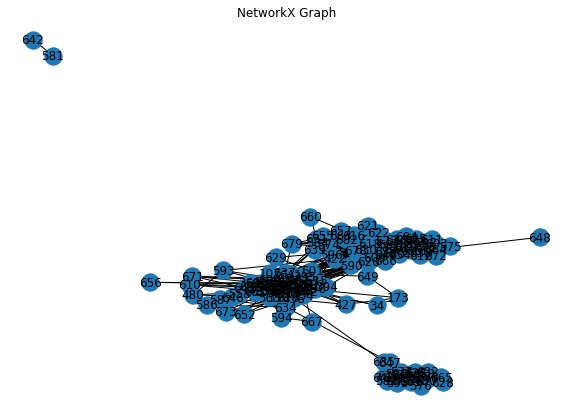

107.edges


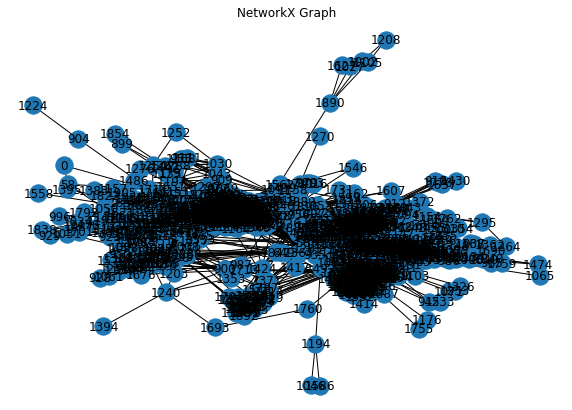

686.edges


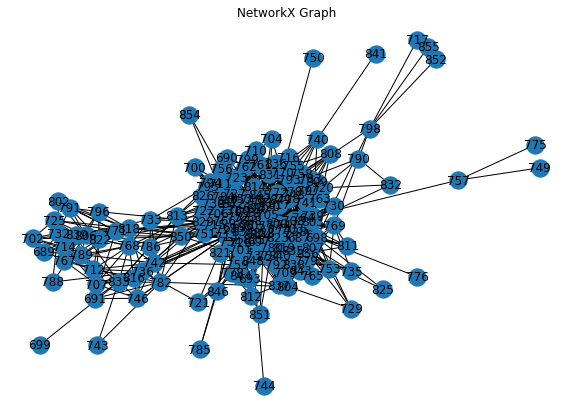

0.edges


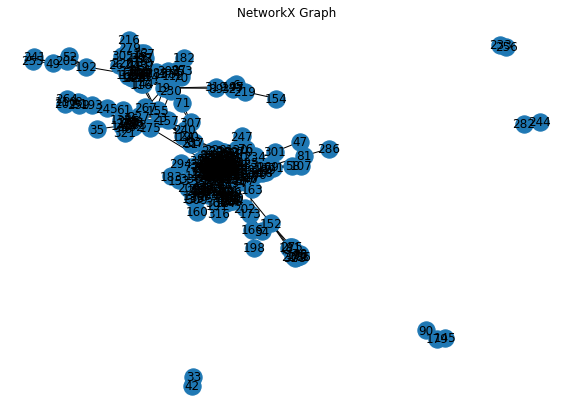

698.edges


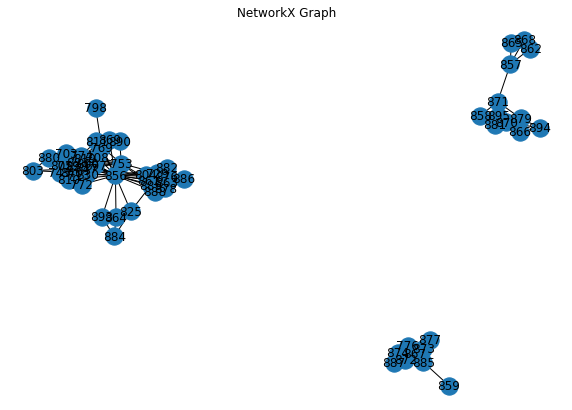

348.edges


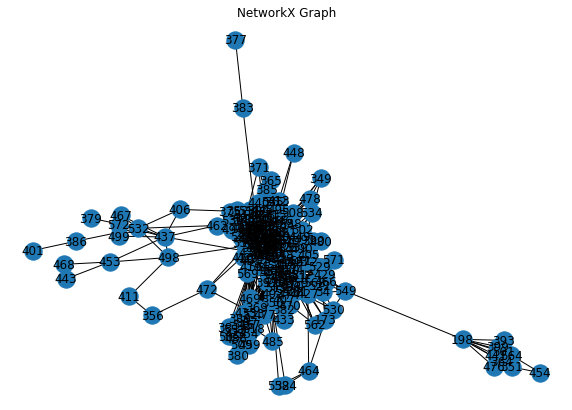

1912.edges


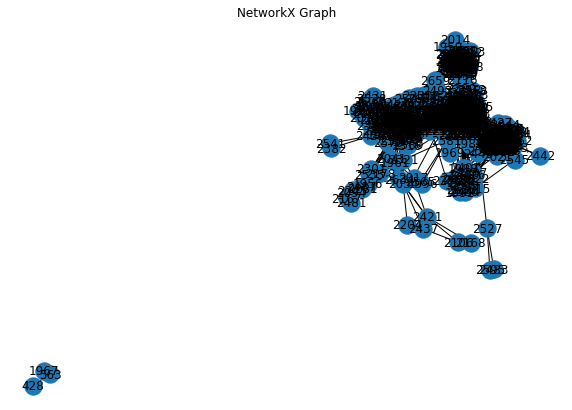

1684.edges


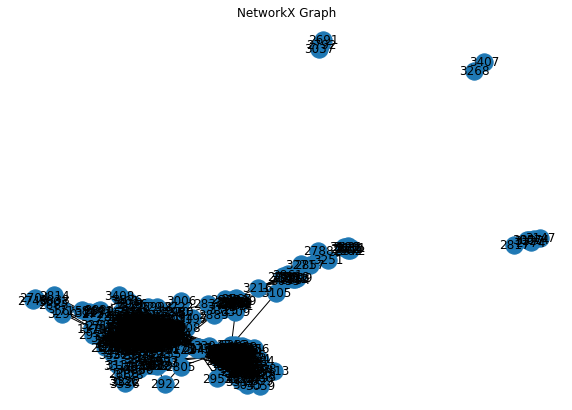

3437.edges


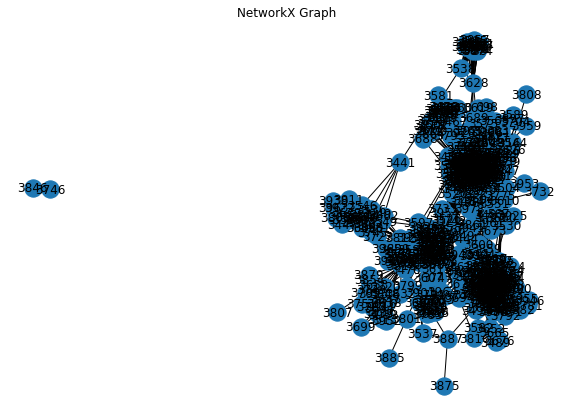

3980.edges


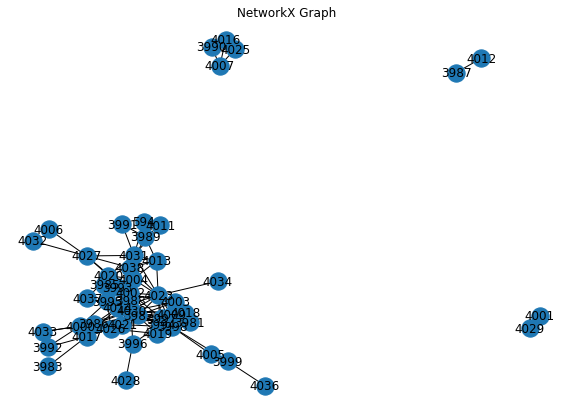

In [19]:
for file in edge_list:
   print(file)
   file_path=path+file
   g=nx.read_edgelist(file_path,create_using=nx.Graph(),nodetype=int)
   pos=nx.spring_layout(g)
   plt.figure(figsize=(10,7))
   plt.title('NetworkX Graph')
   nx.draw_networkx(g, pos=pos)
   plt.axis('off')
   plt.show()

In [20]:
for file in edge_list:
   print(file)
   file_path=path+file
   g=nx.read_edgelist(file_path,create_using=nx.Graph(),nodetype=int)
   info = nx.info(g)
   print(info)


414.edges
Name: 
Type: Graph
Number of nodes: 150
Number of edges: 1693
Average degree:  22.5733
107.edges
Name: 
Type: Graph
Number of nodes: 1034
Number of edges: 26749
Average degree:  51.7389
686.edges
Name: 
Type: Graph
Number of nodes: 168
Number of edges: 1656
Average degree:  19.7143
0.edges
Name: 
Type: Graph
Number of nodes: 333
Number of edges: 2519
Average degree:  15.1291
698.edges
Name: 
Type: Graph
Number of nodes: 61
Number of edges: 270
Average degree:   8.8525
348.edges
Name: 
Type: Graph
Number of nodes: 224
Number of edges: 3192
Average degree:  28.5000
1912.edges
Name: 
Type: Graph
Number of nodes: 747
Number of edges: 30025
Average degree:  80.3882
1684.edges
Name: 
Type: Graph
Number of nodes: 786
Number of edges: 14024
Average degree:  35.6845
3437.edges
Name: 
Type: Graph
Number of nodes: 534
Number of edges: 4813
Average degree:  18.0262
3980.edges
Name: 
Type: Graph
Number of nodes: 52
Number of edges: 146
Average degree:   5.6154


414.edges
community count:  4


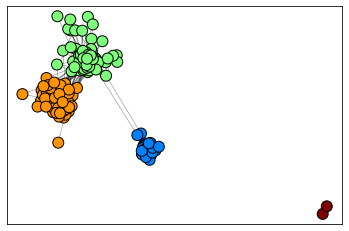

107.edges
community count:  17


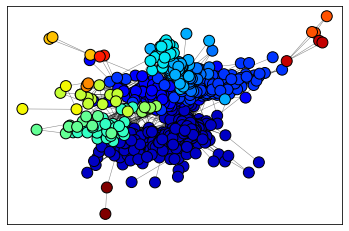

686.edges
community count:  5


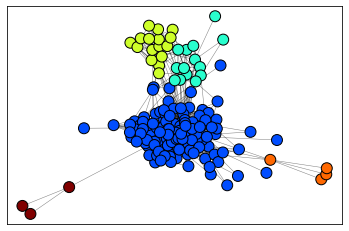

0.edges
community count:  25


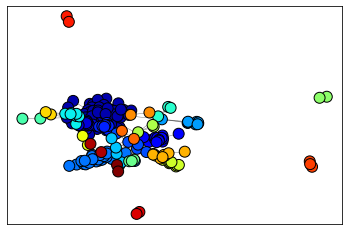

698.edges
community count:  5


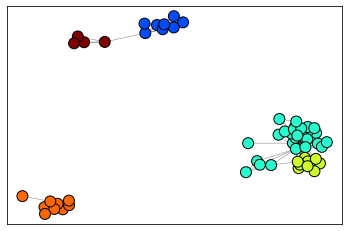

348.edges
community count:  8


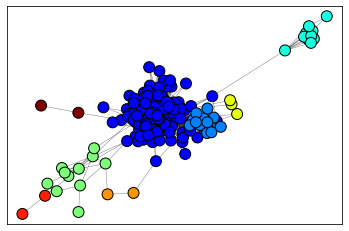

1912.edges
community count:  10


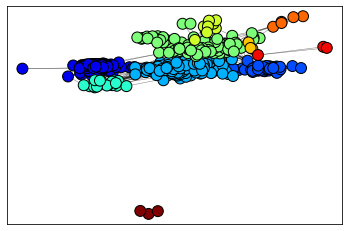

1684.edges
community count:  13


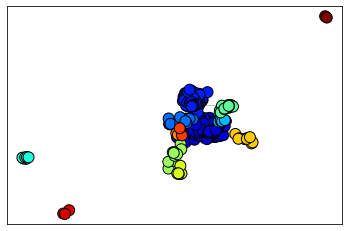

3437.edges
community count:  19


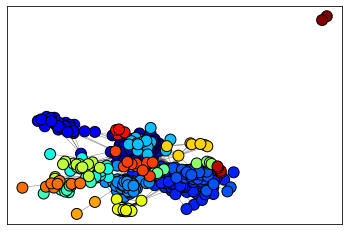

3980.edges
community count:  6


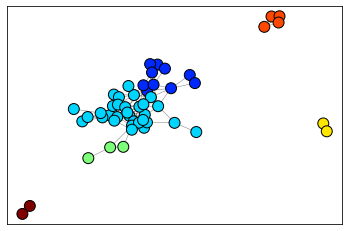

In [22]:
for file in edge_list:
   print(file)
   file_path=path+file
   g=nx.read_edgelist(file_path,create_using=nx.Graph(),nodetype=int)
   info = nx.info(g)
   #print(info)
   pos_list=nx.spring_layout(g)
   res_asyn=list(community.asyn_lpa_communities(g))
   plot_LPA_communities(g,pos_list,res_asyn)